In [156]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
y_train = np.expand_dims(y_train, -1)
y_test = np.expand_dims(y_test, -1)

def generate_random_rgb():
    return (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

random.seed(3)
rgb_dict_with_function = {i: generate_random_rgb() for i in range(10)}

In [148]:
def find_bbox(image, 
              topleft_bottomright_coordinates=True):
    # Find the non-zero pixels
    coords = np.column_stack(np.where(image > 0)).astype(float)
    coords[:, 0] = coords[:, 0].astype(np.float32) / image.shape[0]
    coords[:, 1] = coords[:, 1] / image.shape[1]
    # Find the top_left bottom_right bounding box coordinates
    x_min, y_min = coords.min(axis=0)
    x_max, y_max = coords.max(axis=0)
    

    # return specified label-type (top-left, bottom-right coordinates) 
    if topleft_bottomright_coordinates:
        return np.array([x_min,
                         y_min,
                         x_max,
                         y_max])
    # (center-coordinate, width, height)
    else:
        # Find center, width, and height bounding box coordinates
        x_center = (x_min + x_max) / 2
        y_center = (y_min + y_max) / 2
        width = x_max - x_min
        height = y_max - y_min
        return np.array([x_center,
                         y_center,
                         width,
                         height])

def add_bbox_to_image(image, 
                      label, 
                      label_color_map, 
                      topleft_bottomright_coordinates=True):
    # retrieve rectangle coordinates
    if topleft_bottomright_coordinates:
        x_min, y_min, x_max, y_max = label[1:]
    else:
        x_center, y_center, width, height = label[1:]
        x_min = x_center - width / 2
        y_min = y_center - height / 2
        x_max = x_center + width / 2
        y_max = y_center + height / 2
    # Upscale from normalized coordinates
    x_min = int(np.floor(x_min * image.shape[0]))
    y_min = int(np.floor(y_min * image.shape[1]))
    x_max = int(np.ceil(x_max * image.shape[0]))
    y_max = int(np.ceil(y_max * image.shape[1]))

    image = np.stack([image, image, image], axis=-1)  # Convert to RGB
    image_with_bbox = cv2.rectangle(image, 
                                    (y_min, x_min), 
                                    (y_max, x_max),
                                    color=label_color_map[label[0]], 
                                    thickness=1)
    # Calculate normalized coordinates
    return image_with_bbox

def plot_mnist_images_with_bbox(images, 
                                labels, 
                                label_color_map, 
                                num_rows,
                                num_cols,
                                topleft_bottomright_coordinates=True):
    
    plt.figure(figsize=(10, 4))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        # find the index of the first example of current i in data 
        index = np.where(y_train_bboxes[:, 0] == i)[0][0]

        image_with_bbox = add_bbox_to_image(images[index],
                                            labels[index],
                                            label_color_map,
                                            topleft_bottomright_coordinates=topleft_bottomright_coordinates)
        plt.imshow(image_with_bbox)
        plt.xlabel(i)
    plt.show()


In [ ]:
x_train_bboxes = []
for image in x_train:
    x_train_bboxes.append(find_bbox(image))
x_train_bboxes = np.array(x_train_bboxes)

y_train_bboxes = np.hstack([y_train, x_train_bboxes])

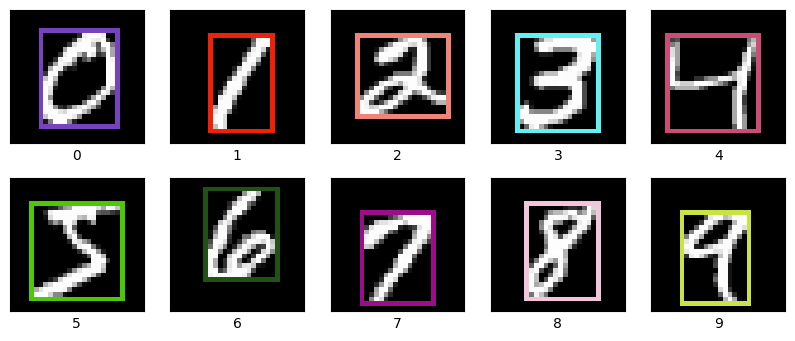

In [157]:
plot_mnist_images_with_bbox(x_train,
                            y_train_bboxes,
                            label_color_map=rgb_dict_with_function,
                            num_rows=2,
                            num_cols=5)